In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.multivariate.manova import MANOVA

In [ ]:
data = pd.read_csv('corpuzs-data.csv', index_col=0)

In [ ]:
for d in data:
    print(d)

In [ ]:
FITNESS = list(data["FITNESS"])
C_TONE = list(data["C_TONE"])
C_TONE_B = list(data["C_TONE_B"])
I_RES = list(data["I_RES"])
L_INT = list(data["L_INT"])
L_DUR = list(data["L_DUR"])
CONS_R = list(data["CONS_R"])
CONS_N = list(data["CONS_N"])
PATTERN_D = list(data["PATTERN_D"])
PATTERN_SD = list(data["PATTERN_SD"])
    

In [ ]:
k = data.keys()[3]
values = list(data[k])
values

In [ ]:
for d in range(2,len(data)):
    key = data.keys()[d]
    values = list(data[key])
    print_plot(values, "Fitness", "Frequency", key, f'{key}.png')

In [ ]:
for d in data:
    print(list(data[d]))

In [ ]:
bins = []
i = -3.0
while i<=5.0:
    bins.append(i)
    i += 1.0
bins

In [ ]:
n, bins, patches = plt.hist(x=FITNESS, bins='auto', color='#000000', rwidth=0.8)
csfont = {'fontname':'Times New Roman'}
plt.rcParams["font.weight"] = "regular"
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Fitness', fontname="Times New Roman", fontweight=400)
plt.ylabel('Frequency', fontname="Times New Roman")
plt.title('Total fitness', fontname="Times New Roman")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig('./figures/fitness.png', dpi=150)

In [ ]:
plt.close()

In [ ]:
def print_plot(data, xlabel, ylabel, title, filename):
    n, bins, patches = plt.hist(x=data, bins='auto', color='#000000', rwidth=0.8)
    plt.locator_params(axis='x', nbins=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    maxfreq = n.max() + 10
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.savefig(f'./figures/{filename}', dpi=150)
    plt.close()


In [ ]:
no_elite = pd.read_csv('./output/GA/experiment-iterations=500-pop=1000-no-elite-mutation/experiment-crossover=1X+2X-2020-02-17.csv', index_col=0)
elite = pd.read_csv('./output/GA/experiment-iterations=500-pop=1000/experiment-crossover=1X+2X-2020-02-17.csv', index_col=0)

In [ ]:
no_elite[0:130]

In [ ]:
elite_max_f = elite['MAX_F'][0:100]
no_elite_max_f = no_elite['MAX_F'][247:347]
plt.xlabel('Generation')
plt.ylabel('Max Fitness')
plt.plot(elite_max_f, marker='.',label='With elite mutation')
plt.plot(no_elite_max_f, marker='^', label='Without elite mutation')
plt.legend()
plt.savefig(f'./figures/elite-vs-non-1x+2x', dpi=150)

In [ ]:
model = pd.read_csv('./output/MODEL/experiment-iterations=500-pop=1000/learning-rate-0.4.csv', index_col=0)
mean_f = model['MEAN_F']
min_f = model['MIN_F']

plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.plot(mean_f, marker='.', markersize=3, label='Mean fitness')
plt.plot(min_f, marker='^', markersize=4, label='Min fitness')
plt.legend()
plt.savefig(f'./figures/learning-rate-min-mean-f', dpi=150)

In [ ]:
model = pd.read_csv('./output/MODEL/iterations-experiment-learning-rate/iterations-experiment-2020-02-19-learning-rate=0.4.csv', index_col=0)
mean_f = model['MEAN_F'][0:500]
min_f = model['MIN_F'][0:500]
max_f = model['MAX_F'][0:500]


plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.plot(mean_f, marker='.', markersize=3, label='Mean fitness')
plt.plot(min_f, marker='^', markersize=4, label='Min fitness')
plt.plot(max_f, label='Max fitness')
lgd = plt.legend(bbox_to_anchor=(1.0, 0.8))
plt.savefig(f'./figures/learning-rate-min-mean-max-f', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
model = pd.read_csv('./output/MODEL/iterations-experiment-no-elitism/iterations-experiment-2020-02-19-no-elitism=0.csv', index_col=0)
mean_f = model['MEAN_F'][49:500]
min_f = model['MIN_F'][49:500]
max_f = model['MAX_F'][49:500]


plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.plot(mean_f, marker='.', markersize=3, label='Mean fitness')
plt.plot(min_f, marker='^', markersize=4, label='Min fitness')
plt.plot(max_f, marker='', markersize=4, label='Max fitness')

lgd = plt.legend(bbox_to_anchor=(1.2, 0.1))
plt.savefig(f'./figures/no-elitism-min-mean-max-f', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
onetwopoint = pd.read_csv('../output/GA/iterations-experiment-GA-8MEASURES-1X+2X/iterations-experiment-2020-02-25-GA-8MEASURES-1X+2X.csv', index_col=0)
ux = pd.read_csv('../output/GA/iterations-experiment-GA-8MEASURES-UX/iterations-experiment-2020-02-25-GA-8MEASURES-UX.csv', index_col=0)
none = pd.read_csv('../output/GA/iterations-experiment-GA-8MEASURES-NO-UX/iterations-experiment-2020-02-25-GA-8MEASURES-NO-UX.csv', index_col=0)
no_elite = pd.read_csv('../output/GA/iterations-experiment-no-elitist-mutation-8-measures-1X+2X/iterations-experiment-2020-02-27-no-elitist-mutation-8-measures-1X+2X.csv', index_col=0)


In [ ]:
onetwopoint_group = onetwopoint.groupby('i').mean()
ux_group = ux.groupby('i').mean()
none_group = none.groupby('i').mean()
no_elite_group = no_elite.groupby('i').mean()


In [ ]:
plt.xlabel('Generation')
plt.ylabel('Mean fitness')
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.3)
plt.plot(onetwopoint_group['MEAN_F'][0:300], marker='^', markevery=25, label='With elite mutation')
#plt.plot(ux_group['MAX_F']['mean'], label='UX')
#plt.plot(none_group['MAX_F']['mean'], marker='', markersize=4, label='NONE')
plt.plot(no_elite_group['MEAN_F'][0:300], marker='D', markevery=25, markersize=4, label='Without elite mutation')

lgd = plt.legend(bbox_to_anchor=(1.4, 0.1))
plt.savefig(f'./figures/GA-elite-vs-no-elite-mean-f.png', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
plt.xlabel('Generation')
plt.ylabel('Mean fitness')
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.3)
plt.plot(onetwopoint_group['MAX_F'][0:300], marker='^', markevery=25, label='With elite mutation')
#plt.plot(ux_group['MAX_F']['mean'], label='UX')
#plt.plot(none_group['MAX_F']['mean'], marker='', markersize=4, label='NONE')
plt.plot(no_elite_group['MAX_F'][0:300], marker='D', markevery=25, markersize=4, label='Without elite mutation')

lgd = plt.legend(bbox_to_anchor=(1.4, 0.1))
plt.savefig(f'./figures/GA-elite-vs-no-elite-max-f.png', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
plt.xlabel('Generation')
plt.ylabel('Mean fitness')
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.3)
#plt.plot(onetwopoint_group['MAX_F'][0:300], marker='^', markevery=25, label='With elite mutation')
#plt.plot(no_elite_group['MAX_F'][0:300], marker='D', markevery=25, markersize=4, label='Without elite mutation')

lgd = plt.legend(bbox_to_anchor=(1.4, 0.1))
plt.savefig(f'./figures/GA-elite-vs-no-elite-sub-raters.png', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
formula = '+'.join(sel_size_data.columns[1:16]) + ' ~ SEL_SIZE'

In [ ]:
sel_size_group = sel_size_data.groupby('SEL_SIZE').mean()

In [ ]:
sel_size_group

In [ ]:
sel_size_data = pd.read_csv('../output/MODEL/selection_size.csv', index_col=0)
maov = MANOVA.from_formula(formula, data=sel_size_data)

In [163]:
s_50 = pd.read_csv('../output/MODEL/iterations-experiment-8-measures-no-elitism-learning-0.5/iterations-experiment-2020-02-26-8-measures-no-elitism-learning-0.5.csv', index_col=0)
s_150 = pd.read_csv('../output/MODEL/iterations-experiment-MODEL-S_SIZE-150-NO-ELITISM-8MEASURES/iterations-experiment-2020-03-03-MODEL-S_SIZE-150-NO-ELITISM-8MEASURES.csv', index_col=0)
s_300 = pd.read_csv('../output/MODEL/iterations-experiment-MODEL-S_SIZE-300-NO-ELITISM-8MEASURES/iterations-experiment-2020-03-03-MODEL-S_SIZE-300-NO-ELITISM-8MEASURES.csv', index_col=0)
s_500 = pd.read_csv('../output/MODEL/iterations-experiment-MODEL-S_SIZE-500-NO-ELITISM-8MEASURES/iterations-experiment-2020-03-03-MODEL-S_SIZE-500-NO-ELITISM-8MEASURES.csv', index_col=0)

s_50_g = s_50.groupby('i').mean()
s_150_g = s_150.groupby('i').mean()
s_300_g = s_300.groupby('i').mean()
s_500_g = s_500.groupby('i').mean()

In [ ]:
values = [4,5,6,7,8,9,10,11,12,13,14,20]
s_50_subraters = s_50_g.iloc[:,values]
s_150_subraters = s_150_g.iloc[:,values]
s_300_subraters = s_300_g.iloc[:,values]
s_500_subraters = s_500_g.iloc[:,values]
sub_raters = s_50_subraters.append(s_150_subraters).append(s_300_subraters).append(s_500_subraters)

In [ ]:
s_50_subraters = s_50_g.iloc[:,values]
s_50_subraters

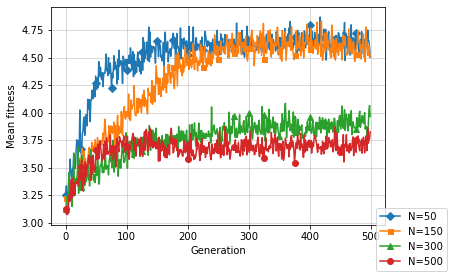

In [162]:
plt.xlabel('Generation')
plt.ylabel('Mean fitness')
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.3)
plt.plot(s_50_g['MAX_F'],  marker='D', markersize=5, markevery=25, label='N=50')
plt.plot(s_150_g['MAX_F'], marker='s', markersize=5, markevery=25, label='N=150')
plt.plot(s_300_g['MAX_F'], marker='^', markersize=6, markevery=25, label='N=300')
plt.plot(s_500_g['MAX_F'], label='N=500', marker='o', markersize=6, markevery=25)

lgd = plt.legend(bbox_to_anchor=(1.2, 0.1))
plt.savefig(f'./figures/MODEL-selection_sizes_max_fitness.png', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')

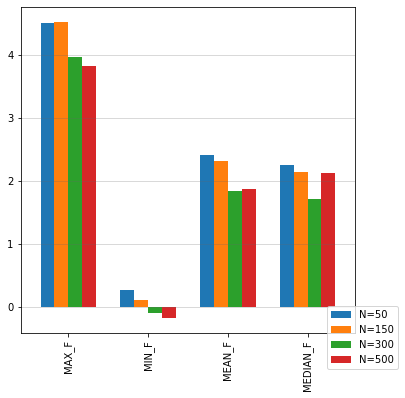

In [198]:
values = [1,2,3,4, 22]
s_size_multiple = pd.read_csv('../output/MODEL/selection_size.csv', index_col=0)
s_size_multiple_group = s_size_multiple.iloc[:,values].groupby('SEL_SIZE').mean().unstack(1).unstack()
s_size_multiple_group.plot.bar(figsize=(6,6), width=0.7)
plt.grid(b=True, axis='y', which='major', color='#666666', linestyle='-', alpha=0.3)
lgd = plt.legend(bbox_to_anchor=(0.90, 0.1), labels=['N=50', 'N=150', 'N=300', 'N=500'])
plt.savefig(f'./figures/MODEL-selection_sizes_fitnesses.png', dpi=150, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [192]:
ax

NameError: name 'ax' is not defined

In [186]:
s_size_multiple_group[50]

MAX_F       4.505039
MIN_F       0.268073
MEAN_F      2.411559
MEDIAN_F    2.256023
Name: 50, dtype: float64